In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from datetime import datetime as dtime
from config_file import *
%reload_ext autoreload
%autoreload 2

In [7]:
surfer_raw = pd.read_csv('Data//Surfers//2023-03-07-yoav-omer.csv')
surfer_laps = pd.read_csv('Data//process_data//idopumi_yoavc_smartwatches_results7.3.23.csv')
print(surfer_raw.columns)
surfer_laps.columns

Index(['time', 'servertime', 'latitude', 'longitude', 'HDT - Heading True',
       'SOG - Speed over Ground', 'COG - Course over Ground',
       'TWA - True Wind Angle', 'TWD - True Wind Direction', 'Heel',
       'Trim Fore / Aft', 'GPS Satellites', 'GPS HAcc'],
      dtype='object')


Index(['start', 'end', 'ido seconds', 'ido data points', 'up/down', 'side',
       'yoav on top', 'ido on top', 'ido speed', 'yoavc speed',
       'yoav c speed new', 'ido heading', 'yoavc heading', 'ido vmg',
       'yoavc vmg', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22',
       'Unnamed: 23'],
      dtype='object')

In [23]:
surfer_raw['time'] = pd.to_datetime(surfer_raw['time'])

In [36]:
input_format = '%a %d %b %Y %H:%M:%S'
surfer_raw['time'][0]
type(surfer_raw.columns.values)


start
end
ido seconds
ido data points
up/down
side
yoav on top
ido on top
ido speed
yoavc speed
yoav c speed new
ido heading
yoavc heading
ido vmg
yoavc vmg
Unnamed: 15
Unnamed: 16
Unnamed: 17
Unnamed: 18
Unnamed: 19
Unnamed: 20
Unnamed: 21
Unnamed: 22
Unnamed: 23


In [39]:

input_format = '%a %d %b %Y %H:%M:%S'
new_columns = surfer_raw.columns.tolist() + ['up/down', 'side']
surfer_data = pd.DataFrame(columns=new_columns)
for i, lap in surfer_laps.iterrows():
    start_time = dtime.strptime(lap['start'], input_format)
    end_time = dtime.strptime(lap['end'], input_format)
    row_lap = surfer_raw[(surfer_raw['time'] >= start_time) & (surfer_raw['time'] <= end_time)]
    row_lap['up/down'] = lap['up/down']
    row_lap['side'] = lap['side']
    surfer_data = surfer_data.append(row_lap)
surfer_data.head()
    

C:\Users\matan\AppData\Local\Temp\ipykernel_19060\2755152042.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_lap['up/down'] = lap['up/down']
C:\Users\matan\AppData\Local\Temp\ipykernel_19060\2755152042.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  row_lap['side'] = lap['side']
C:\Users\matan\AppData\Local\Temp\ipykernel_19060\2755152042.py:10: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  surfer_data = sur

,time,servertime,latitude,longitude,HDT - Heading True,SOG - Speed over Ground,COG - Course over Ground,TWA - True Wind Angle,TWD - True Wind Direction,Heel,Trim Fore / Aft,GPS Satellites,GPS HAcc,up/down,side
9796,2023-03-07 10:36:16.600,2023-03-07 13:59:53.321,29.541413,34.948105,117.59,0.027399,117.60,70.57,188.17,-14.24,-0.74,15,0.8628,DOWN,Right
9797,2023-03-07 10:36:17.600,2023-03-07 13:59:53.321,29.541413,34.948105,117.52,0.023950,117.51,70.66,188.17,-14.26,-0.73,15,0.8647,DOWN,Right
9798,2023-03-07 10:36:18.300,2023-03-07 13:59:53.321,29.541413,34.948105,117.85,0.032997,117.73,70.44,188.17,-14.29,-0.71,15,0.8647,DOWN,Right
9799,2023-03-07 10:36:19.600,2023-03-07 13:59:53.321,29.541413,34.948105,118.01,0.031546,118.01,70.15,188.17,-14.26,-0.73,15,0.8667,DOWN,Right
9800,2023-03-07 10:36:20.600,2023-03-07 13:59:53.322,29.541413,34.948105,117.84,0.023400,117.86,70.30,188.17,-14.27,-0.70,15,0.8677,DOWN,Right


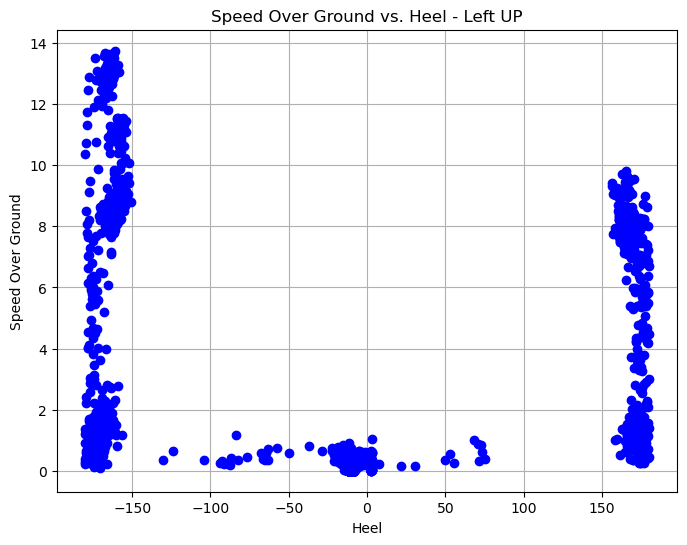

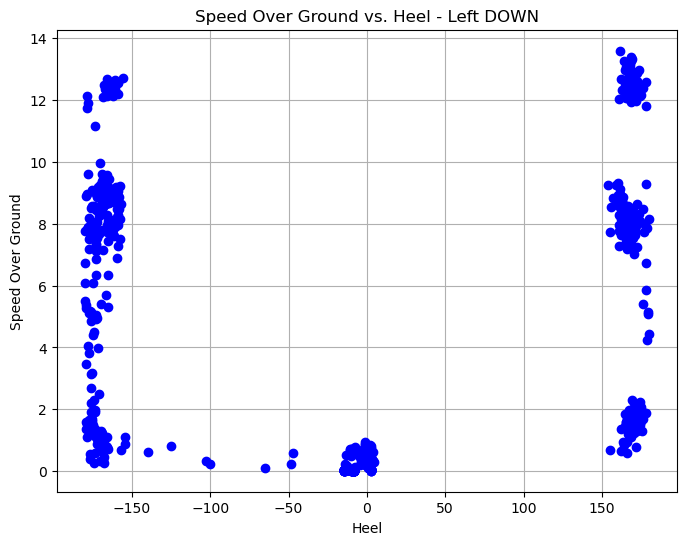

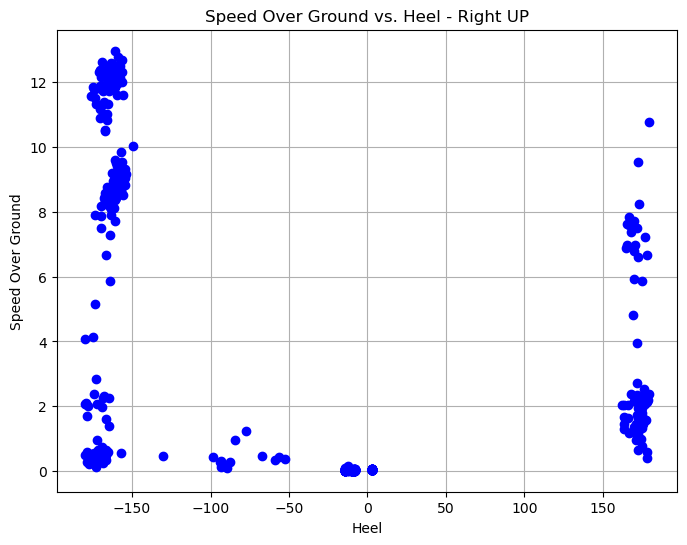

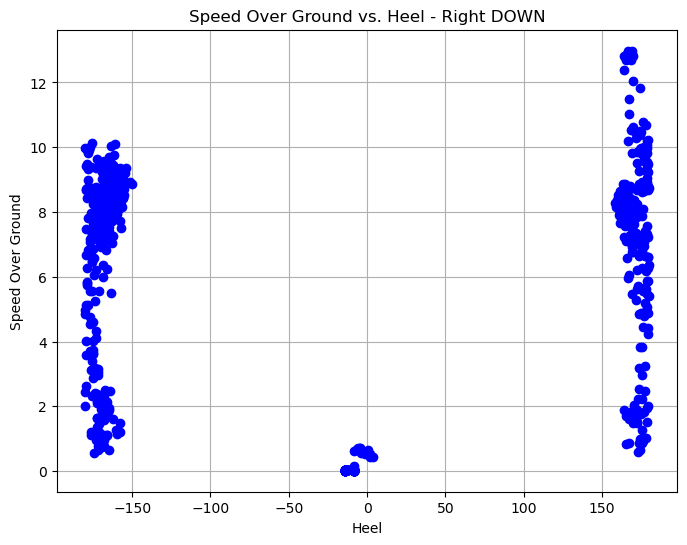

In [55]:
for side in ['Left', 'Right']:
    for direction in ['UP', 'DOWN']:
        filtered_data = surfer_data[(surfer_data['up/down'] == direction) & (surfer_data['side'] == side)]
        # Create the graph
        plt.figure(figsize=(8, 6))  # Set the figure size (optional)
        plt.plot(filtered_data['Heel'], filtered_data['SOG - Speed over Ground'], marker='o', linestyle='None', color='b')
        plt.xlabel('Heel')
        plt.ylabel('Speed Over Ground')
        title = 'Speed Over Ground vs. Heel - ' + side + ' ' + direction
        plt.title(title)
        plt.grid(True)
        plt.show()